In [2]:
from helpers import *

In [3]:
df = pd.read_csv("rfm_and_delay_undersample.csv")
print(df.shape)
df.head()

(5994, 6)


,recency_score,frequency_score,monetary_score,rfm_score,avg_satisfaction,avg_delivery_delay
0,1,1,2,112,4.0,1.0
1,3,1,2,312,5.0,10.0
2,4,1,5,415,2.0,27.0
3,5,1,3,513,5.0,5.0
4,4,1,2,412,5.0,20.0


In [4]:
df['rfm_score'] = pd.qcut(df['rfm_score'], q=5, labels=False) + 1 
df['avg_delivery_delay'] = pd.qcut(df['avg_delivery_delay'], q=5, labels=False) + 1 


In [5]:
df.head()

,recency_score,frequency_score,monetary_score,rfm_score,avg_satisfaction,avg_delivery_delay
0,1,1,2,1,4.0,1
1,3,1,2,2,5.0,3
2,4,1,5,4,2.0,5
3,5,1,3,5,5.0,1
4,4,1,2,3,5.0,5


## TSNE 

Projecting 2-dimensional data to 2D


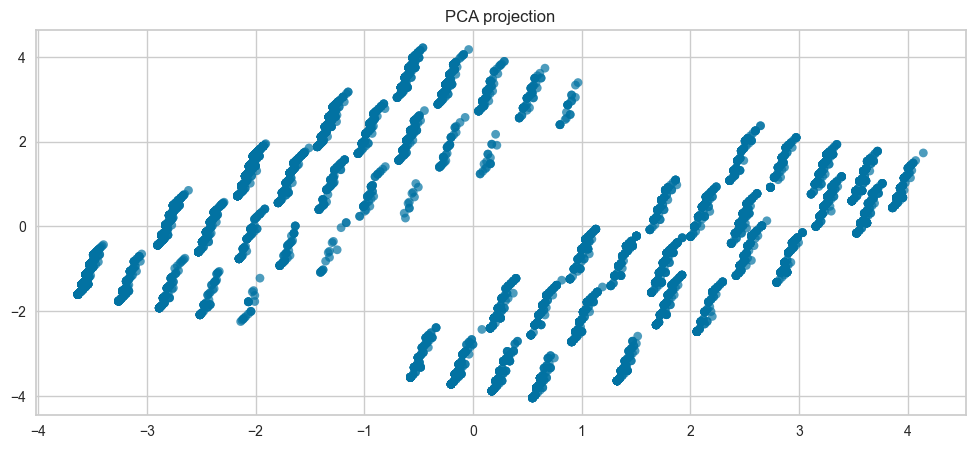

In [6]:
pca = PCA(n_components=2)
X = df
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X_reduced.shape[1])

plt.figure(figsize=(12,5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
            edgecolor='none', alpha=0.7, s=40)
plt.title('PCA projection')
plt.show()

In [7]:
df

,recency_score,frequency_score,monetary_score,rfm_score,avg_satisfaction,avg_delivery_delay
0,1,1,2,1,4.000000,1
1,3,1,2,2,5.000000,3
2,4,1,5,4,2.000000,5
3,5,1,3,5,5.000000,1
4,4,1,2,3,5.000000,5
...,...,...,...,...,...,...
5989,5,5,3,5,3.000000,1
5990,1,5,2,1,3.000000,3
5991,2,5,5,2,3.500000,5
5992,2,5,3,2,4.333333,5


In [8]:
tsne = TSNE(random_state=42)
X_tsne_pca = tsne.fit_transform(X_reduced)

Text(0.5, 1.0, 'TSNE without PCA')

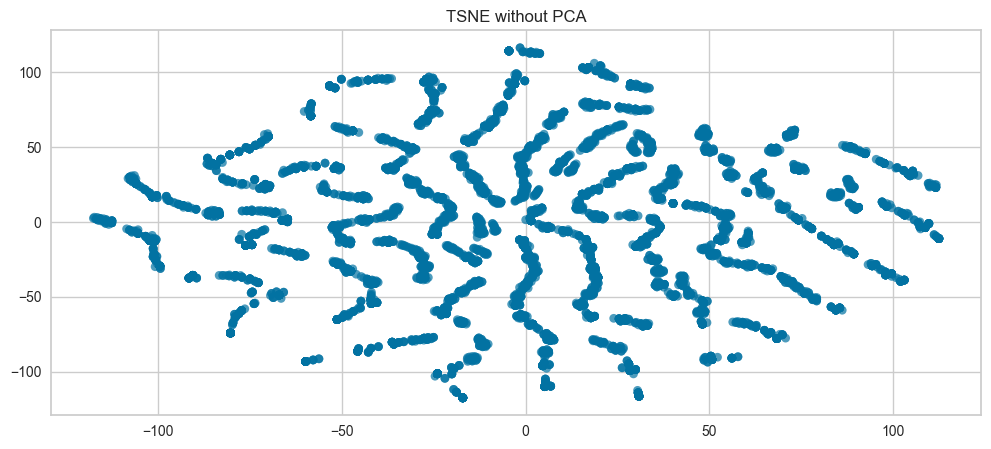

In [9]:
plt.figure(figsize=(12,5))
plt.scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1],
            edgecolor='none', alpha=0.7, s=40)
plt.title('TSNE without PCA')

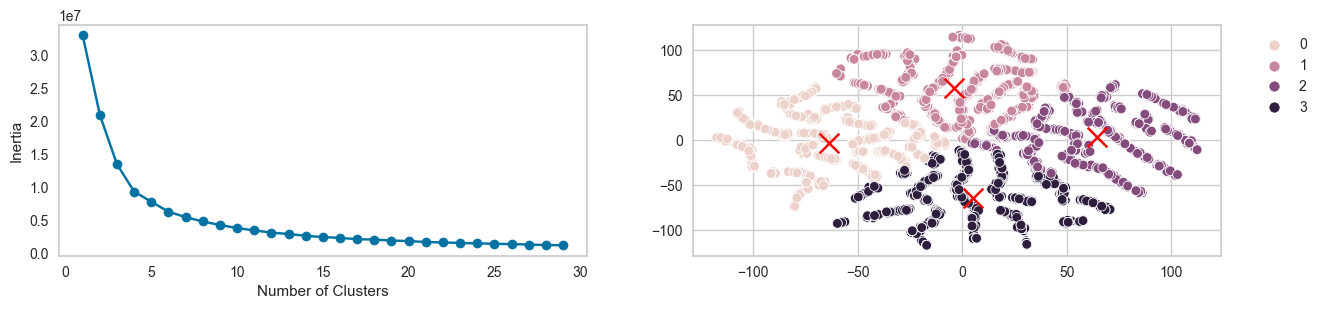

<Figure size 1000x300 with 0 Axes>

In [10]:
show_segmentation(X_tsne_pca, 4)

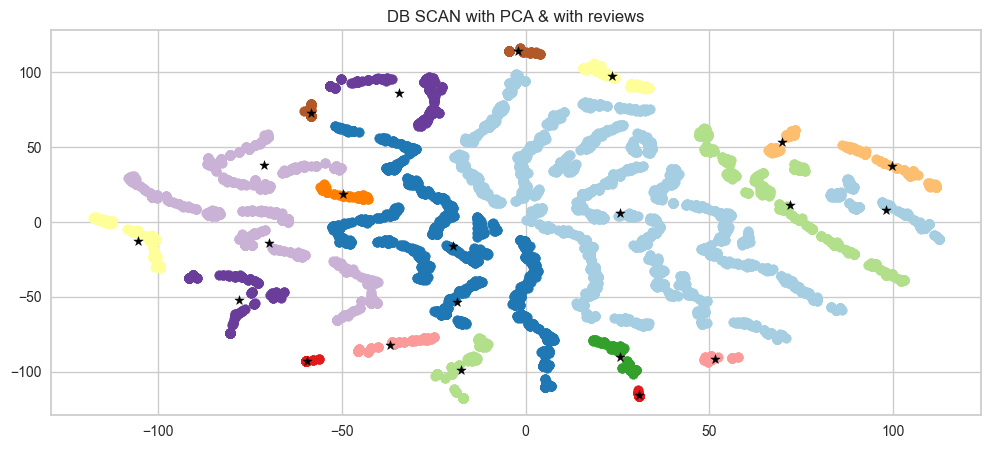

n_clusters 22


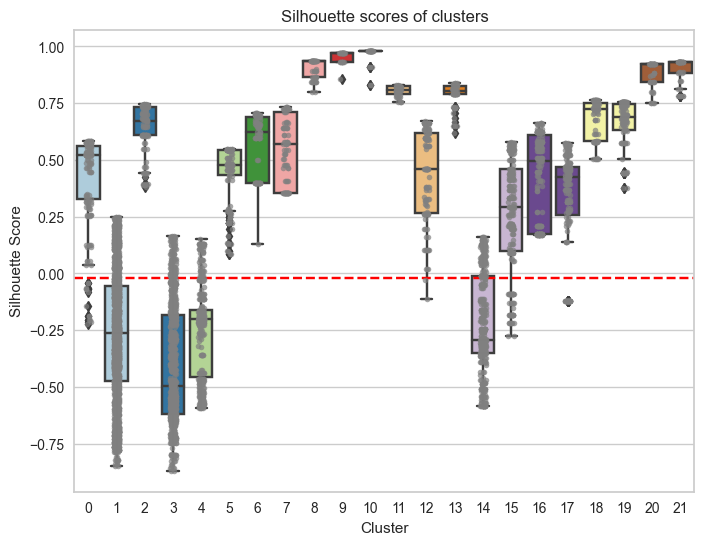

In [11]:
do_dbscan(X_tsne_pca, "DB SCAN with PCA & with reviews", eps=9)

#### PCA Explainability (without review)

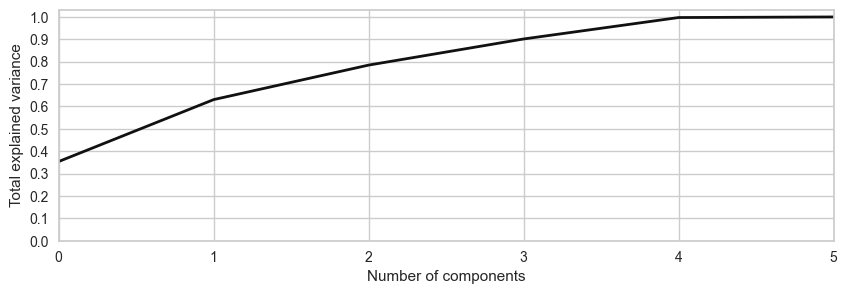

In [12]:
pca = PCA().fit(df)

plt.figure(figsize=(10,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 5)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [13]:
# perform PCA on the data  
pca = PCA(n_components=1)  
pca.fit(df)  
  
# get the loadings for the first principal component  
loadings = pca.components_[0]  
  
# create a dataframe to display the loadings  
loadings_df = pd.DataFrame({'Feature': df.columns, 'Loading': loadings})  
loadings_df = loadings_df.sort_values('Loading', ascending=False)  
  
print(loadings_df)  

              Feature   Loading
5  avg_delivery_delay  0.035572
4    avg_satisfaction -0.023505
0       recency_score -0.330572
2      monetary_score -0.374591
3           rfm_score -0.404074
1     frequency_score -0.765056


In [14]:
explained_variance = pca.explained_variance_ratio_[0] # explained variance of the first principal component  
feature_contrib = loadings_df['Loading'].apply(lambda x: x**2)  
loadings_df["Contribution"] = round(feature_contrib / feature_contrib.sum() * explained_variance,5) 

In [15]:
loadings_df

,Feature,Loading,Contribution
5,avg_delivery_delay,0.035572,0.00045
4,avg_satisfaction,-0.023505,0.00020
0,recency_score,-0.330572,0.03867
2,monetary_score,-0.374591,0.04965
3,rfm_score,-0.404074,0.05778
1,frequency_score,-0.765056,0.20712
